# An Oscar Date with Data...!!

In [1]:
# loading libraries to deal with the dataset..!!

import pandas as pd
import numpy as np

In [2]:
# loading dataset converted in to csv using online platfrom : https://www.zamzar.com/convert/xlsx-to-csv/
df = pd.read_csv('oscar-data.csv')

In [3]:
# let's take a look.!!

df.head()

,Year,Movie,Rated,Release Date,Runtime,Genres,Language,Country,Awards,Metascore,Rating,Votes,Oscar Winner
0,2017,The Shape of Water,R,12/7/2017,123 min,"Adventure, Drama, Fantasy","English, American Sign Language, Russian","USA, Canada",Won 2 Golden Globes. Another 53 wins & 176 nom...,86.0,8.2,15301.0,NaN
1,2017,Three Billboards Outside Ebbing,R,11/9/2017,115 min,"Crime, Drama",English,"UK, USA",Won 4 Golden Globes. Another 64 wins & 152 nom...,88.0,8.3,43466.0,NaN
2,2017,Dunkirk,PG-13,7/20/2017,106 min,"Action, Drama, History","English, French, German","UK, Netherlands, France, USA",Nominated for 8 Oscars. Another 32 wins & 158 ...,94.0,8.1,332229.0,NaN
3,2017,Lady Bird,R,2/14/2018,94 min,"Comedy, Drama",English,USA,Won 2 Golden Globes. Another 53 wins & 130 nom...,94.0,8.1,24682.0,NaN
4,2017,Get Out,R,2/23/2017,104 min,"Horror, Mystery, Thriller",English,"Japan, USA",Nominated for 4 Oscars. Another 87 wins & 145 ...,84.0,7.7,235146.0,NaN


In [4]:
# Let's fill missing value in 'Oscar Winner' column to 'No'

df['Oscar Winner'].fillna('No', inplace=True)

In [5]:
# We want to predict for the year 2018, we seperate 2017 movies from the dataset..!

test = df.loc[df['Year'] == 2017]

df = df.loc[df['Year'] != 2017]

In [6]:
df.index = range(0, len(df))

Let's check how many films have won the oscars...!!

In [7]:
#importing libraries for plotting

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

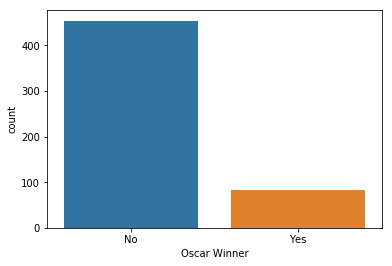

Number of Class No :  454
Number of Class Yes :  83
Percentage of No :  0.845437616387
Percentage of Yes :  0.154562383613


In [8]:
# Let's look at the count of Oscar Winners and Loosers throughout the years in our dataset..!!

ax = sns.countplot( df['Oscar Winner'], label="Count") 
plt.show()
Z, O = df['Oscar Winner'].value_counts()

print('Number of Class No : ',Z)
print('Number of Class Yes : ',O)

print('Percentage of No : ',  df['Oscar Winner'].value_counts(normalize=True)[0])
print('Percentage of Yes : ',  df['Oscar Winner'].value_counts(normalize=True)[1])

# Missing Data

There are some missing data in the dataset.. With some searching in IMDB I could grab some data to fill some of those things..!!

In [9]:
# filling missing features with data from IMDB

df.loc[df['Movie'].isin(['The Godfather Part III']), 'Rated'] = 'R'
df.loc[df['Rated'].isin(['NOT RATED']), 'Rated'] = 'UNRATED'
df.loc[df['Movie'].isin(['Sons and Lovers', 'The Guns of Navarone', 'Room at the Top', 'Sunset Blvd.', 'East Lynne', 'The Pied Piper', 'Goodbye Mr. Chips', 'The Personal History of Rachel DuPree', 'Skippy', 'The Front Page', 'Alibi', 'The Hollywood Revue of 1929' ]), 'Rated'] = 'UNRATED'
df.loc[df['Movie'].isin(['Around the World in Eighty Days']), 'Rated'] = 'G'
df.loc[df['Rated'].isin(['Approved']), 'Rated'] = 'APPROVED'

df.loc[df['Movie'].isin(['The Russians Are Coming']), 'Rated'] = 'UNRATED'
df = df.drop(294, axis=0)
df.index = range(0, len(df))

df.loc[df['Movie'].isin(['Sunset Blvd.']), 'Runtime'] = '110 min'
df.loc[df['Movie'].isin(['The Personal History of Rachel DuPree']), 'Runtime'] = '110 min'
df.loc[df['Movie'].isin(['The Front Page']), 'Runtime'] = '101 min'

df.loc[df['Movie'].isin(['The Front Page']), 'Genres'] = 'Comedy'
df.loc[df['Movie'].isin(['Goodbye Mr. Chips']), 'Genres']= ' Drama, Romance '

df.loc[df['Movie'].isin(['The Front Page']), 'Language'] = 'English'
df.loc[df['Movie'].isin(['The Crowd', 'Chang: A Drama of the Wilderness', 'The Personal History of Rachel DuPree']), 'Language'] = 'English'

df.loc[df['Movie'].isin(['The Front Page']), 'Country'] = 'US'

df.loc[df['Movie'].isin(['The Front Page']), 'Rating'] = 6.8
df.loc[df['Movie'].isin(['The Personal History of Rachel DuPree']), 'Rating'] = 5.0

# flling Votes with mean number of Votes
df['Votes'].fillna(int(df['Votes'].mean()), inplace=True)

Rating plays an important part in choosing films to see (In viewer's point of view, ofcourse.!)

Let's look at a histogram plot of Rating feature and see how it is distributed..!!

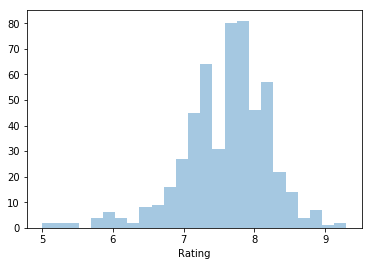

In [10]:
# plotting histogram for Rating with seaborn..!!

sns.distplot(df['Rating'], bins=25, kde=False)

Wow, There is a large number of films in the range 7.5 - 8.0 and pretty less above 9

Let's look how the Oscar Winning Movie's Ratings are Distributed..!!

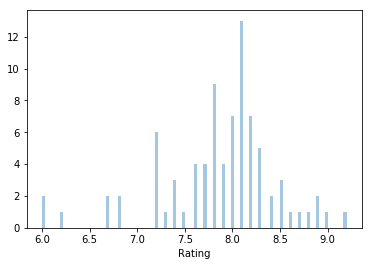

In [11]:
sns.distplot(df.loc[df['Oscar Winner'] == 'Yes', 'Rating'], bins=100, kde=False)

Most of the winning movies have a Rating of 8.1.. That seems interesting..!!

Let's look how the **Non - Oscar Winning Movie's** Ratings are Distributed..!!

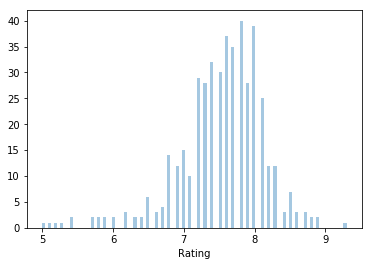

In [12]:
sns.distplot(df.loc[df['Oscar Winner'] == 'No', 'Rating'], bins=100, kde=False)

We got a movie with rating greater than 9 that wasn't awarded Oscar, Let's look which movie that was..!

In [18]:
df.loc[df['Rating'] == df.loc[df['Oscar Winner'] == 'No', ['Rating']].max(), :]

,Year,Movie,Rated,Release Date,Runtime,Genres,Language,Country,Awards,Metascore,Rating,Votes,Oscar Winner
146,1994,The Shawshank Redemption,R,10/13/1994,142 min,"Crime, Drama",English,USA,Nominated for 7 Oscars. Another 19 wins & 29 n...,80.0,9.3,1899849.0,No


**The Shawshank Redemption** is that movie with 9.3 Rating in IMBD that failed to get an Oscar for best picture..!! (What a great movie it was, I wonder why it went down so..!!)

Let's look which Oscar Winning Movies had the highest and lowest Rating in IMDB

In [32]:
max_rated = df.loc[df['Oscar Winner'] == 'Yes', ['Rating']].max()
max_rated

Rating    9.2
dtype: float64

In [33]:
df.loc[df['Rating'] == 9.2, :]

,Year,Movie,Rated,Release Date,Runtime,Genres,Language,Country,Awards,Metascore,Rating,Votes,Oscar Winner
252,1971,The Godfather,R,3/23/1972,175 min,"Crime, Drama","English, Italian, Latin",USA,Won 3 Oscars. Another 24 wins & 27 nominations.,100.0,9.2,1303505.0,Yes


In [36]:
df.loc[df['Oscar Winner'] == 'Yes', ['Rating']].min()

Rating    6.0
dtype: float64

In [37]:
df.loc[df['Rating'] == 6.0, :]

,Year,Movie,Rated,Release Date,Runtime,Genres,Language,Country,Awards,Metascore,Rating,Votes,Oscar Winner
140,1995,The Postman,R,12/24/1997,177 min,"Action, Adventure, Drama",English,USA,7 wins & 7 nominations.,29.0,6.0,60595.0,No
315,1959,The Alamo,PG-13,4/8/2004,137 min,"Drama, History, War","English, Spanish",USA,1 nomination.,47.0,6.0,17805.0,No
497,1932,Cavalcade,PASSED,4/14/1933,112 min,"Drama, Romance, War",English,USA,Won 3 Oscars. Another 1 win & 1 nomination.,NaN,6.0,3475.0,Yes
515,1930,Cimarron,PASSED,2/8/1931,123 min,"Drama, Western","English, French",USA,Won 3 Oscars. Another 2 wins & 4 nominations.,NaN,6.0,4217.0,Yes


** Notes : ** It is clear that 'Rating' alone can't be used to predict whether the Movie will be awarded the Oscar not..!! 

Let's look at other features to get more insights about the dataset..!

**Votes** seem's to be an important feature as the Votes have high importance in deciding the winner of Oscar..!!

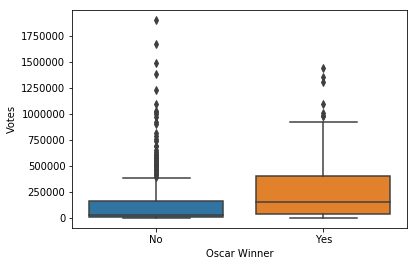

In [38]:
# Box plot to look at the number of Votes and Distribution..!!

sns.boxplot(x="Oscar Winner", y="Votes", data=df)

It is not surprising that the Movies that won the Oscar have higher number of Votes..!! BoxPlots makes this clear..!!

Also, keep in mind that there are some outliers.!!

**Note** : This feature will be important for us in making a predictive model..!!

Let's now handle the 'Runtime' feature in the dataset that describe the length in mints of the movie..!

It's necessary to convert the feature in to numberic features so that we could manipulate it.

In [39]:
# a simple regex based function to take runtime in the format given in dataset and convert in to numeric
# i.e 121 mints to 121

import re

def to_runtime(value):
    try:
        return int(re.findall(r'\d+', value)[0])
    except:
        return np.nan

In [40]:
# A lambda call to do the magic.!!

df['Runtime'] = df['Runtime'].map(lambda x : to_runtime(x))

Let's now look at the Runtime column to see how the Runtime is distributed for the winning and loosing movies..!!

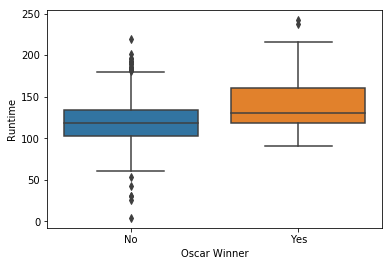

In [41]:
# Boxplot to look at the Runtime by class..!!

sns.boxplot(x="Oscar Winner", y="Runtime", data=df)
plt.show()

Cool, it seems interesting.. Movies that won the Oscar had higher Runtime compared to most of others..!

Let's look at some histograms to analyse this detail futher..!!

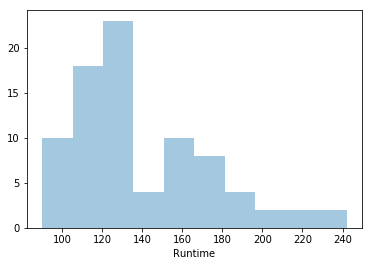

In [42]:
# histogram plot on Runtime for the OScar winning movies.!!

sns.distplot(df.loc[df['Oscar Winner'] == 'Yes', 'Runtime'], bins=10, kde=False)

We got a oscar winning movie with 240 mints Runtime.. Let's see which movie that was..!!

In [43]:
df.loc[df['Oscar Winner'] == 'Yes', ['Runtime']].max()

Runtime    242
dtype: int64

In [44]:
df.loc[df['Runtime'] == 242, :]

,Year,Movie,Rated,Release Date,Runtime,Genres,Language,Country,Awards,Metascore,Rating,Votes,Oscar Winner
372,1947,Hamlet,PG-13,12/24/1996,242,Drama,English,"UK, USA",Nominated for 4 Oscars. Another 9 wins & 21 no...,NaN,7.8,32510.0,Yes


Note : Runtime can help us to predict the winning movie.. Let's do further analysis on other Columns..!!

# Feature Engineering

Let's create some features from the dataset and look how it goes..!

In [45]:
# simple python function to parse the date to get month 

def return_month(date):
    
    try:
        return (int(date[:2]))
    except:
        return (int(date[:1]))

In [46]:
# lambda map to do the magic..!!

df['released_moth'] = df['Release Date'].map(lambda x : return_month(x))

# Release Quarter

Let's check whether there is any dependence between the winning movie and the quarter it is released..!!

In [47]:
# simple python trick to determine the quarter of the year (1/2/3/4) in which the movie is released..!

df['q1_release'] = df['released_moth'].apply(lambda m: 1 if m <= 3 else 0)
df['q2_release'] = df['released_moth'].apply(lambda m: 1 if m > 3 and m <= 6 else 0)
df['q3_release'] = df['released_moth'].apply(lambda m: 1 if m > 6 and m <= 9 else 0)
df['q4_release'] = df['released_moth'].apply(lambda m: 1 if m > 9 else 0)

# we won't be needing the month feature we just created.. Let's purge it..!!
del df['released_moth']

Let's look at the histograms for the 4 qauter features we generated and see which quater have higher probability of winning..!!

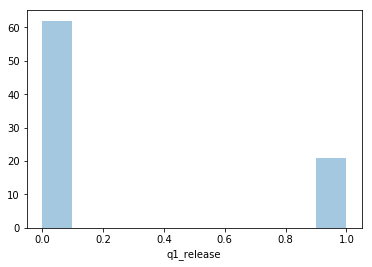

In [48]:
# plotting histogram for q1_release

sns.distplot(df.loc[df['Oscar Winner'] == 'Yes', 'q1_release'], bins=10, kde=False)

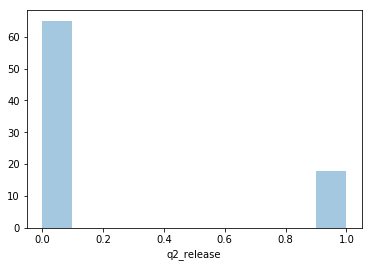

In [49]:
# plotting histogram for q2_release

sns.distplot(df.loc[df['Oscar Winner'] == 'Yes', 'q2_release'], bins=10, kde=False)

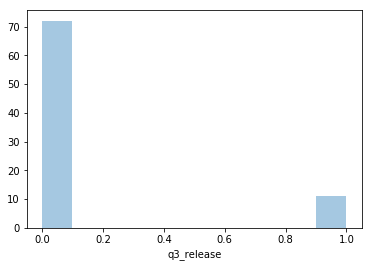

In [50]:
# plotting histogram for q3_release

sns.distplot(df.loc[df['Oscar Winner'] == 'Yes', 'q3_release'], bins=10, kde=False)

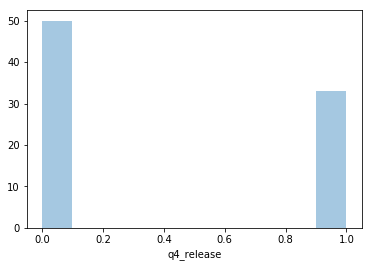

In [20]:
# plotting histogram for q4_release

sns.distplot(df.loc[df['Oscar Winner'] == 'Yes', 'q4_release'], bins=10, kde=False)

It seems that the movies released in quater 4 have higher chance for winnning..!!

This feature will be useful for us.!

# Metascore

We can see that there are some missing metascore in the dataset.. I couldn't find those information from the IMDB. Most of them are old movies, which explains lack of metascore..

After some reaserch, I learned that metascore have a relationship with Rating.. So let's generate some values for missing metascores from the Rating also, with use of a random number..!!

In [53]:
# Defining the range of Rating and simple random number based trick to get the metascore corresponding to it...!!
values = df.loc[df['Metascore'].isnull()]['Rating'].value_counts()

meta_dict = {}

for x in values.index:
    if x > 8.0:
        meta_dict[x] = np.random.randint(80, 87) * 1.0
    elif x > 7.50 and x <= 8.0:
        meta_dict[x] = np.random.randint(70, 80) * 1.0
    elif x >= 7.00 and x <= 7.50:
        meta_dict[x] = np.random.randint(60, 70) * 1.0
    else:
        meta_dict[x] = np.random.randint(50, 60) * 1.0

In [54]:
# filling the computed the values.!!

for x in values.index:
    df.loc[df['Rating'].isin([x]), 'Metascore'] = meta_dict[x]

The trick done to fill the Metascore is not that scientific ofcourse.. But it still let's do some exploration with that feature.!

Let's look at the boxplots to get a better understanding about the districution of the Metascore feature

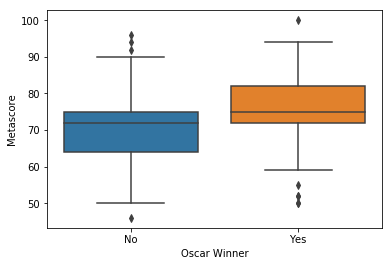

In [55]:
# plotting boxplots per class..!!

sns.boxplot(x="Oscar Winner", y="Metascore", data=df)

Cool, the Metascore feature seems to be high for the winning movies..!! 

Keep in mind that we generared the values for the missing values from Rating feature which had similiar distribution..!!

Anyway let's move on..!!

# Genres

Movie Genres have a huge impact on the audience, let's generate some features based on the 'Genre' feature in the dataset and check how it goes..!!

Genres are given comma seperated for analysis it is better to convert it to a set of categorical features..!!

In [56]:
# let's make a set of unique genres in the dataset..!!

genres = df.Genres.values
gen_set = set(genres)

total_genres = []

for x in gen_set:
    total_genres.append(str(x).split(','))
    
unique_genres = set([i for sublist in total_genres for i in sublist])

In [57]:
# convert it to list..!!
unique_genres = list(unique_genres)

In [58]:
# Split each one based on ','
for i in range(len(unique_genres)):
    unique_genres[i] = unique_genres[i].replace(' ', '')
    

In [59]:
# again to list..!!
unique_genres = list(set(unique_genres))

In [60]:
# making columns in the dataset.!!
for x in unique_genres:
    df[x] = np.nan

In [34]:
# resetting the index of dataframe..!!

df.index = range(0, len(df))

In [61]:
# Let's fill the columns generated..!!
# if the movie have genre - Romance,Comedy then the coolumns in dataframe Romance and Comedy will be set to 1 else to 0

for i in range(len(df)):
    
    genres = []
    
    genres = df.loc[i, 'Genres']
    
    genres = genres.split(',')
    
    for k in range(len(genres)):
        genres[k] = genres[k].replace(' ', '')
    
    genres = list(set(genres))
    
    for x in genres:
        df.loc[i, x] = 1
        
    # print(i)
    

In [62]:
# filling 0's and taking care of datatype..!!

for x in unique_genres:
    df[x].fillna(0, inplace=True)
    df[x] = df[x].astype(int)

Let's plot pairplots with all the genres and see which ones have high chance for winning..!!

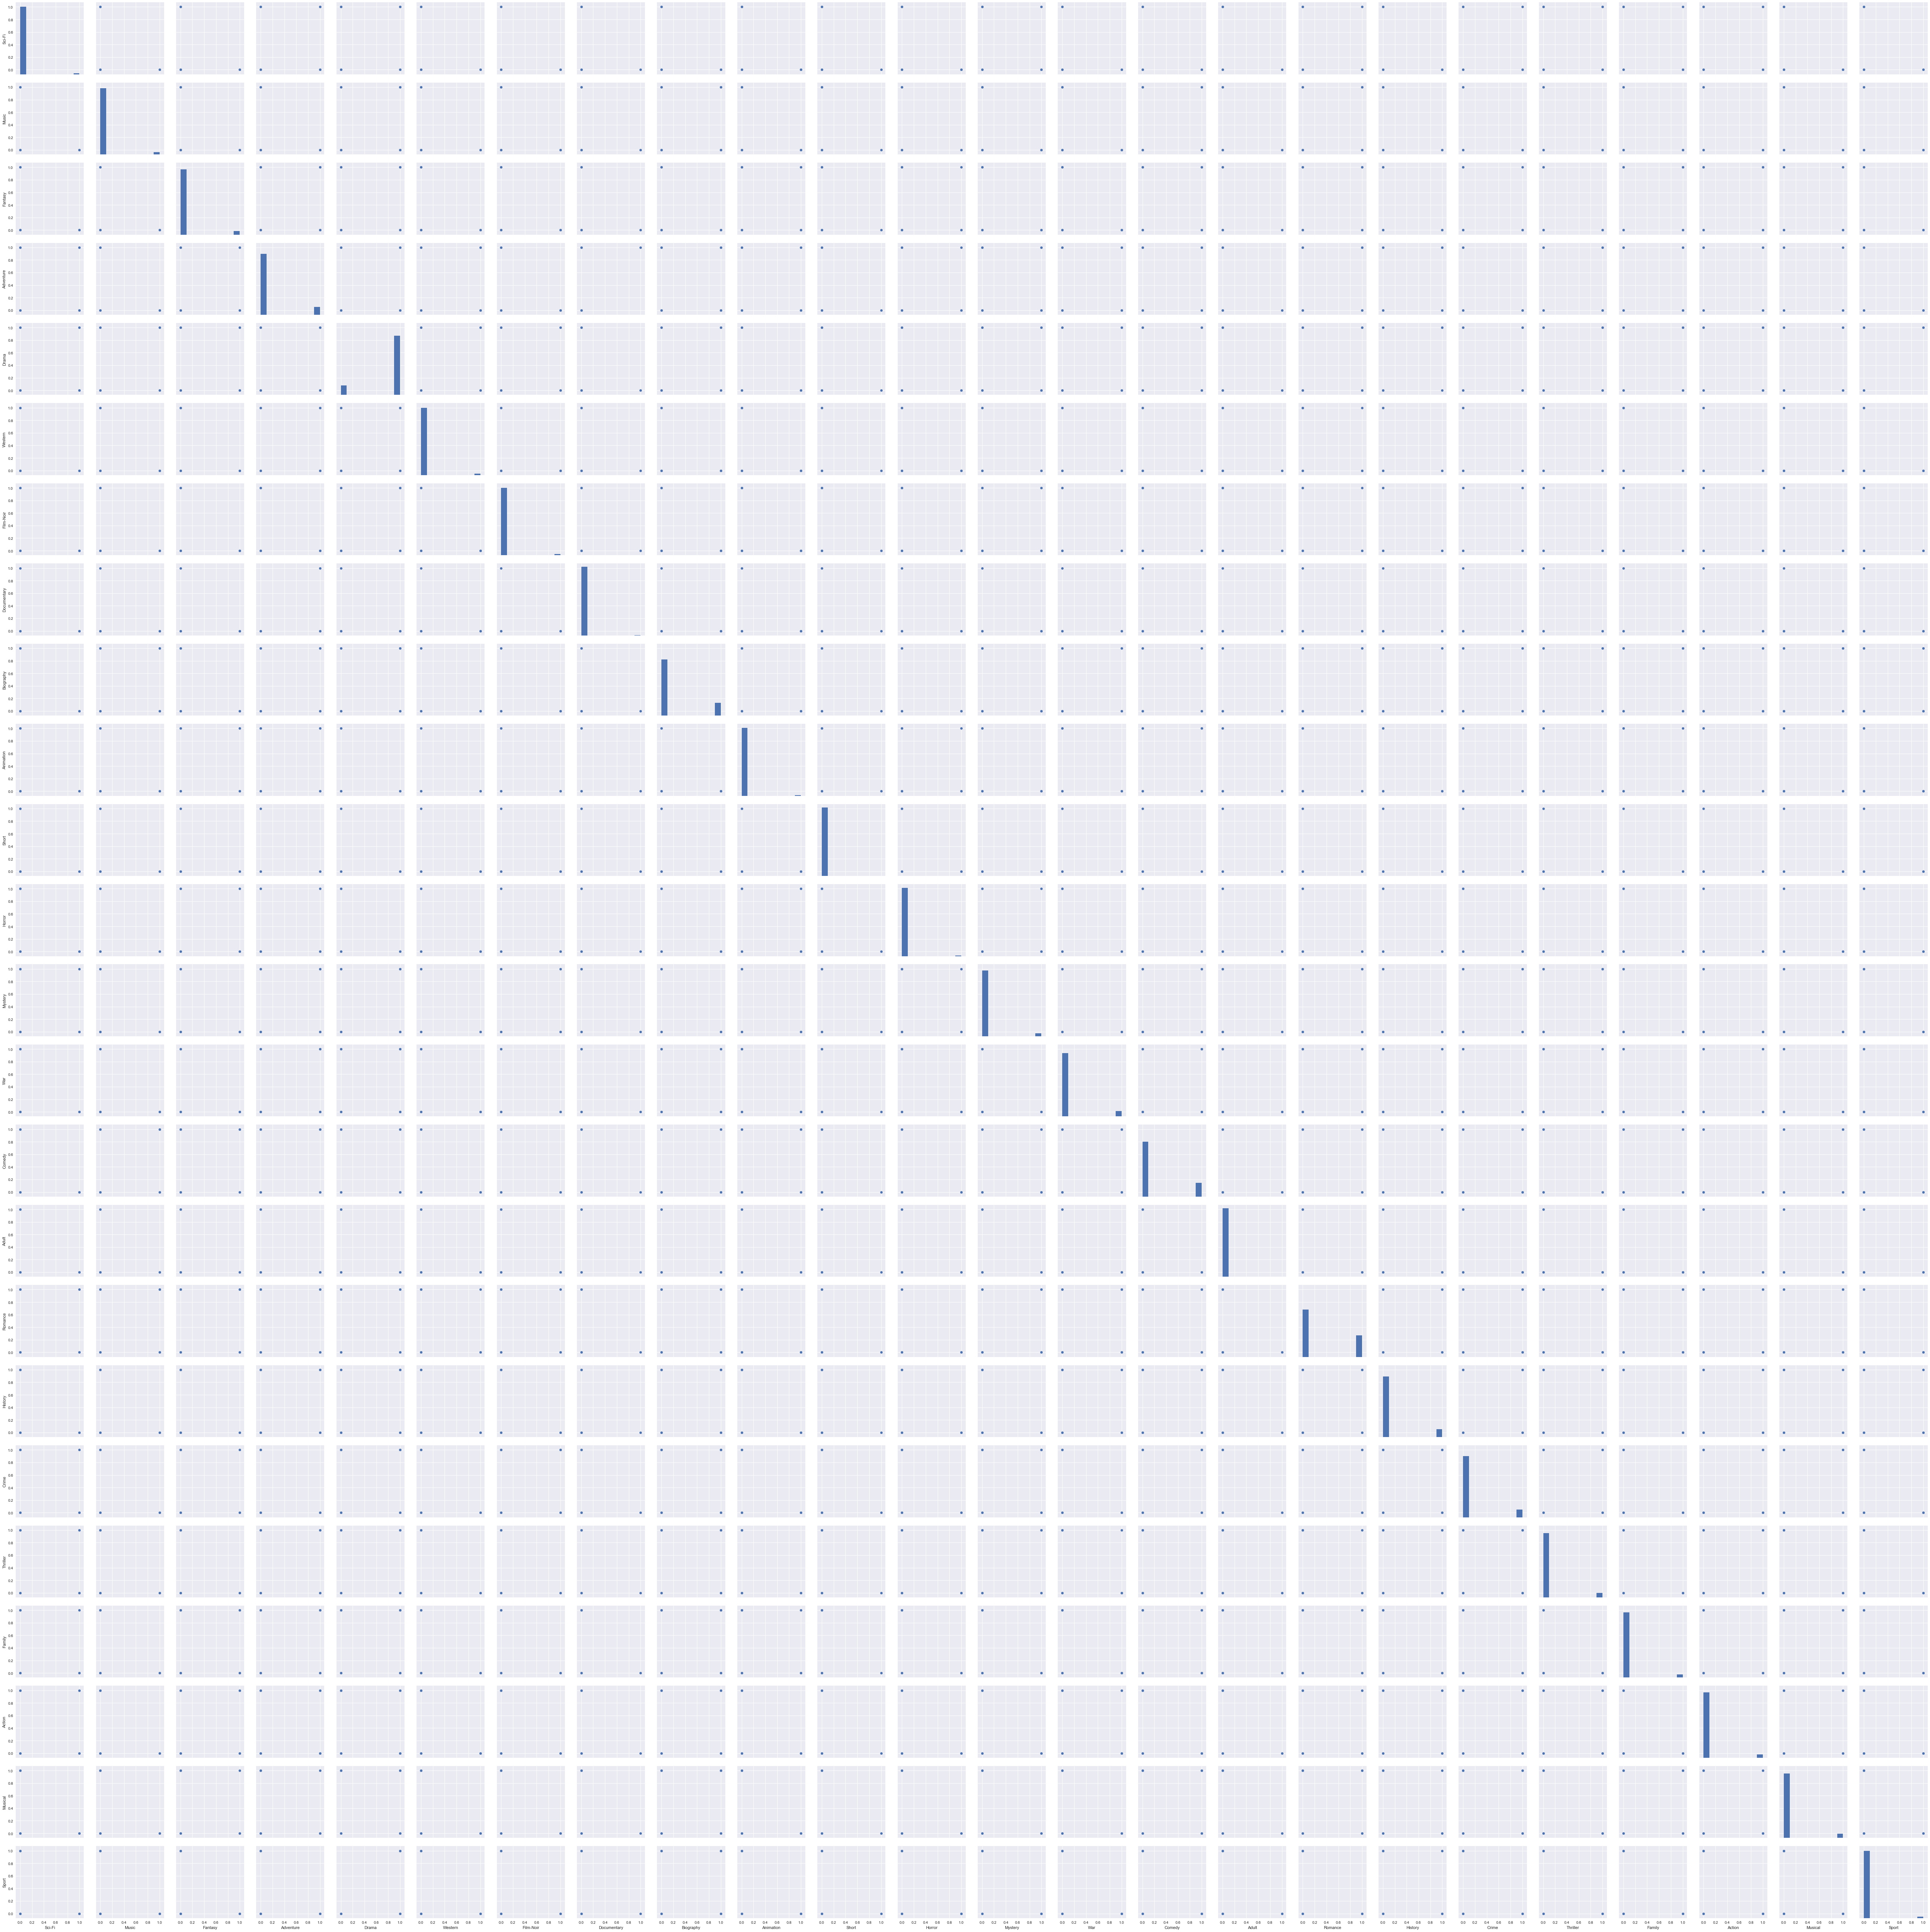

In [64]:
# plotting pairplots..!!
sns.set()
cols = unique_genres

sns.pairplot(df[cols], size = 3.0)

plt.show()

Zooming in to the pairplots make it clear that the Movies with Genre 'Drama' have higher chance for winning..!!

It is followed by 'Romance' and 'Biography'

Let's look in to the numbers now.!!

In [79]:
df.loc[df['Oscar Winner'] == 'Yes', 'Drama'].value_counts()

1    78
0     5
Name: Drama, dtype: int64

In [80]:
df.loc[df['Oscar Winner'] == 'Yes', 'Romance'].value_counts()

0    60
1    23
Name: Romance, dtype: int64

# Countries

The Countries in which the movie was made have a good impact on the results..

So let's make some categorical features based on the Country just like we did with the Genres..!!

In [65]:
# taking a list of Countries in the dataset..!!
countries = df.Country.values
country_set = set(countries)

total_countries = []

for x in country_set:
    total_countries.append(str(x).split(','))

In [66]:
# list of unique county combination..!!

unique_countries = set([i for sublist in total_countries for i in sublist])
unique_countries = list(unique_countries)

In [67]:
# splitting data w.r.t ','

for i in range(len(unique_countries)):
    unique_countries[i] = unique_countries[i].replace(' ', '')

In [42]:
# making a list of the countries.!!
unique_countries = list(set(unique_countries))

In [43]:
# there is 'US' and 'USA' coming in the Countries column let's keep USA and remove US
unique_countries.remove('US')

In [68]:
# make columns in the DataFrame..!!
for x in unique_countries:
    df[x] = np.nan

In [69]:
# filling columns with 1's in appropriate locations..!!

for i in range(len(df)):
    
    coutries = []
    
    coutries = df.loc[i, 'Country']
    
    coutries = coutries.split(',')
    
    for k in range(len(coutries)):
        coutries[k] = coutries[k].replace(' ', '')
    
    coutries = list(set(coutries))
    
    for x in coutries:
        if x == 'US':
            df.loc[i, 'USA'] = 1
        else:
            df.loc[i, x] = 1
        
    # print(i)
    

In [70]:
# filling 0's and fixing the datatype
for x in unique_countries:
    df[x].fillna(0, inplace=True)
    df[x] = df[x].astype(int)

In [73]:
# Let's look how the movies from USA performed..!!

df.loc[df['Oscar Winner'] == 'Yes', 'USA'].value_counts()

1    79
0     4
Name: USA, dtype: int64

WOW, 79 movies from USA won the Oscars.. That's impressive.. This detail will help in prediction..!!

Let's make a feature - 'produced_USA' that indicate whether the movie is from USA.!!

Let's look at the histogram and make things more clear..!!

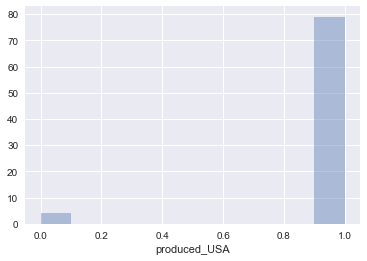

In [76]:
# histogram plot for the movies that won the Oscar and production in USA

df['produced_USA'] = df['USA'].apply(lambda x: 1 if x == 1 else 0)

sns.distplot(df.loc[df['Oscar Winner'] == 'Yes', 'produced_USA'], bins=10, kde=False)
plt.show()

# Languages

Let's deal with language feature just like we did with Genres and Countries..!!

In [77]:
# taking the unique list and making columns.!

lang = df.Language.values
lang_set = set(lang)

total_lang = []

for x in lang_set:
    total_lang.append(str(x).split(','))
    
unique_lang = set([i for sublist in total_lang for i in sublist])
unique_lang = list(unique_lang)

for i in range(len(unique_lang)):
    unique_lang[i] = unique_lang[i].replace(' ', '')
    
unique_lang = list(set(unique_lang))

for x in unique_lang:
    df[x] = np.nan

In [78]:
# filling those columns
for i in range(len(df)):
    
    langs = []
    
    langs = df.loc[i, 'Language']
    
    langs = langs.split(',')
    
    for k in range(len(langs)):
        langs[k] = langs[k].replace(' ', '')
    
    langs = list(set(langs))
    
    for x in langs:
        df.loc[i, x] = 1
        
    # print(i)
    

In [79]:
# filling 0's and setting datatype
for x in unique_lang:
    df[x].fillna(0, inplace=True)
    df[x] = df[x].astype(int)

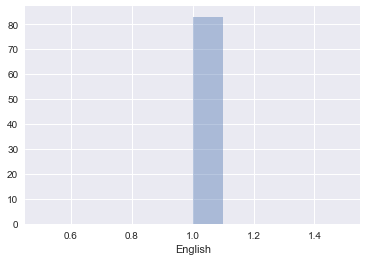

In [80]:
# histogram of the Movies that won and have English as language..!

sns.distplot(df.loc[df['Oscar Winner'] == 'Yes', 'English'], bins=10, kde=False)

All the movies that won was English.. NOt just English had an English release too..!

In [84]:
# Encode the Rated feature in the dataframe for processing

from sklearn.preprocessing import LabelEncoder

rated_encoder = LabelEncoder()
df['Rated'] = rated_encoder.fit_transform(df['Rated'].astype('str'))

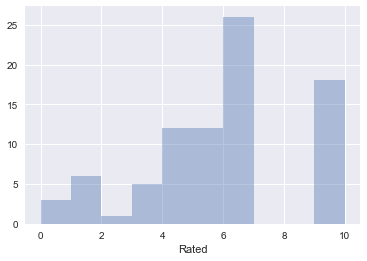

In [85]:
# histogram of Rated feature..!!
sns.distplot(df.loc[df['Oscar Winner'] == 'Yes', 'Rated'], bins=10, kde=False)

It seems the Movies with Rated 6 have high chance for winning.. What is that Rating.? Let's findout with Inverse Transforming.!

In [86]:
rated_encoder.inverse_transform(6)

'R'

R rating have highest chance for a win.. Interesting..!!

**RESULT** : It's been found that some features will have high importance in our model that we are going to make..

The features we made w.r.t Genres, Language, Runtime, Metascore could be of high importance..!!

**Things we missed out** : Apart from these features the features like Awards and the Movie name may be having some importance in winning.

**Morgan Freeman** once told in an interview that, The movie **The Shawshank Redemption** didn't won the Oscar for the best picture only because of the name.

So, let's do some NLP based trick to include those features in our model to predict the results..!!

Let's wrap up EDA now and continue with the model in **prediction_notebook.ipynb**